In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [9]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [10]:
fashion_mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape)

(60000, 28, 28)


In [11]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [12]:
K = len(set(y_train))
print(K)

10


In [13]:
#Building a model, using functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 11s 188us/sample - loss: 0.5121 - accuracy: 0.8103 - val_loss: 0.3938 - val_accuracy: 0.8525
Epoch 2/15
60000/60000 [==============================] - 10s 175us/sample - loss: 0.3518 - accuracy: 0.8684 - val_loss: 0.3350 - val_accuracy: 0.8752
Epoch 3/15
60000/60000 [==============================] - 11s 177us/sample - loss: 0.3033 - accuracy: 0.8854 - val_loss: 0.3347 - val_accuracy: 0.8745
Epoch 4/15
60000/60000 [==============================] - 10s 174us/sample - loss: 0.2720 - accuracy: 0.8982 - val_loss: 0.2991 - val_accuracy: 0.8889
Epoch 5/15
60000/60000 [==============================] - 11s 178us/sample - loss: 0.2495 - accuracy: 0.9064 - val_loss: 0.2908 - val_accuracy: 0.8929
Epoch 6/15
60000/60000 [==============================] - 11s 189us/sample - loss: 0.2278 - accuracy: 0.9137 - val_loss: 0.2901 - val_accuracy: 0.8994
Epoch 7/15
60000/60000 [====================

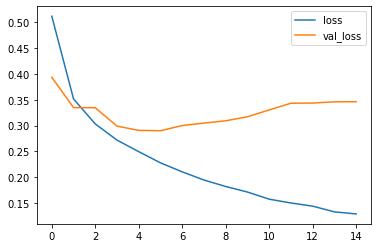

In [16]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

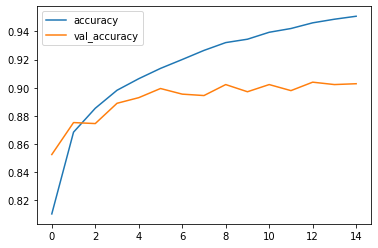

In [17]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

# Plot Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
import itertools

Confusion Matrix without Normalization
[[874   0  24  10   3   2  81   0   6   0]
 [  3 980   1  10   3   0   1   0   2   0]
 [ 15   2 868  10  39   0  64   0   2   0]
 [ 14   7  14 911  32   0  21   0   1   0]
 [  1   0  80  18 837   0  63   0   0   1]
 [  0   0   0   1   0 958   0  23   1  17]
 [111   1  58  20  97   0 706   0   7   0]
 [  0   0   0   0   0   6   0 969   0  25]
 [  3   1   5   3   5   2  10   1 968   2]
 [  0   0   0   0   0   4   1  38   0 957]]


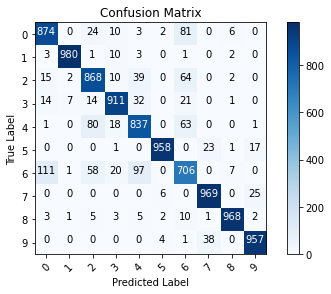

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without Normalization")
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [20]:
labels = '''
Tshirt
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle Boot
'''.split()

Text(0.5, 1.0, 'True Label: Coat Predicted Label: Shirt')

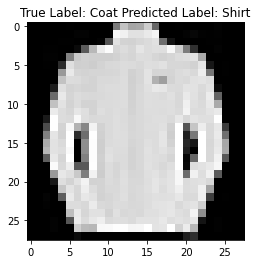

In [27]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True Label: %s Predicted Label: %s" % (labels[y_test[i]], labels[p_test[i]]))